In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import myModule.simulation as myModule
import myModule.halo as halo
import myModule.gas as gas
import myModule.chandrasekhar as chandra
import myModule.accretion as accretion

In [3]:
G = 1
v_s = 1
m_tot = 2

In [4]:
def m_dot(r,v,m):
    if m < m_tot:
        return 4*np.pi*(m_tot-m)*gas.density(r)*G*G*m*m*(v_s*v_s+np.sum(v*v))**-1.5
    return 0

In [5]:
mySim = myModule.simulation()

haloGravity = myModule.interaction('Halo Gravity', halo.acceleration)
gasGravity = myModule.interaction('Gas Gravity', gas.acceleration)
dynFriction = myModule.interaction('Dynamical Friction', chandra.acceleration, sigma=76.65)
massAccretion = myModule.interaction('Mass Accretion', accretion.acceleration, m_dot = m_dot)

mySim.interactions.append(haloGravity)
mySim.interactions.append(gasGravity)
mySim.interactions.append(dynFriction)
mySim.interactions.append(massAccretion)

mySim.updateDerivatives()

In [28]:
t_init = 0
t_final = 1000
n_steps = 100000

r_init = np.array([0,1,0])
v_init = np.array([2**(-.5),0,0])
m_init = np.array([1])

s_init = np.concatenate((r_init, v_init, m_init))

In [29]:
mySim.integrate(t_init, t_final, n_steps, s_init)

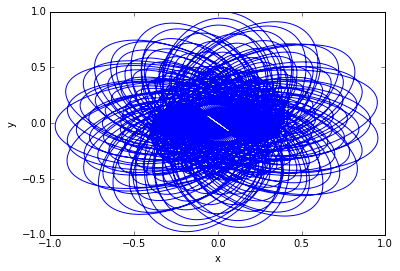

In [30]:
plt.plot(mySim.path[:,0],mySim.path[:,1])
plt.xlabel('x')
plt.ylabel('y')

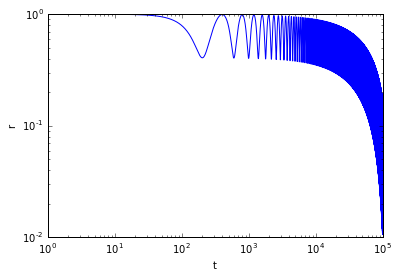

In [33]:
plt.plot(np.sum(mySim.path[:,:3]**2,axis=1)**.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('r')

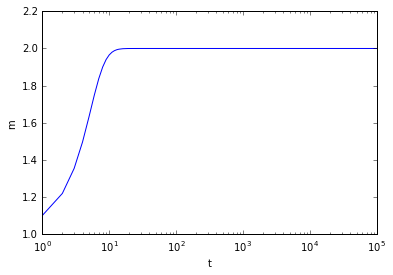

In [34]:
plt.plot(mySim.path[:,6])
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('m')